## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [217]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [218]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col = "Timestamp", 
    parse_dates = True, 
    infer_datetime_format = True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [219]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp.head())


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [220]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col = "Timestamp", 
    parse_dates = True, 
    infer_datetime_format = True
)


In [221]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635
2019-01-07 17:05:00,4006.01,4006.01,4005.50,$4005.5,2.699700,10814.241898,4005.719991
2019-01-07 17:06:00,4005.51,4006.01,4005.51,$4005.99,1.752778,7021.183546,4005.745614


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [222]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

#check drop NaN
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [223]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 3: Convert the data type of the Close column to a `float`.

In [224]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
display(bitstamp.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [225]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

#drop duplicates
bitstamp = bitstamp.drop_duplicates()

#display
display(bitstamp.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [226]:
# STEP 1 FOR COINBASE
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna()

#check drop NaN
coinbase.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [227]:
# STEP 2 FOR COIN BASE. Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [228]:
#STEP 3 FOR COINBASE change type to float.
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
display(coinbase.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [229]:
# STEP 4 DROP DUPLICATES. Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

#drop duplicates
coinbase = coinbase.drop_duplicates()

#display
display(coinbase.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [230]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


Timestamp
2015-12-31 19:01:00    430.89
2015-12-31 19:02:00    430.89
2015-12-31 19:04:00    431.06
2015-12-31 19:05:00    430.54
2015-12-31 19:06:00    432.52
Name: Close, dtype: float64

In [231]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,"Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()


Timestamp
2015-12-31 19:01:00    430.40
2015-12-31 19:02:00    430.40
2015-12-31 19:03:00    430.36
2015-12-31 19:04:00    430.39
2015-12-31 19:05:00    430.96
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [232]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()


count    1.347772e+06
mean     4.503924e+03
std      3.956149e+03
min      1.500000e+00
25%      7.888900e+02
50%      3.788990e+03
75%      6.929443e+03
max      1.966575e+04
Name: Close, dtype: float64

In [233]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()


count    1.549523e+06
mean     4.091926e+03
std      3.913501e+03
min      6.000000e-02
25%      6.754000e+02
50%      2.710730e+03
75%      6.593500e+03
max      1.989199e+04
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

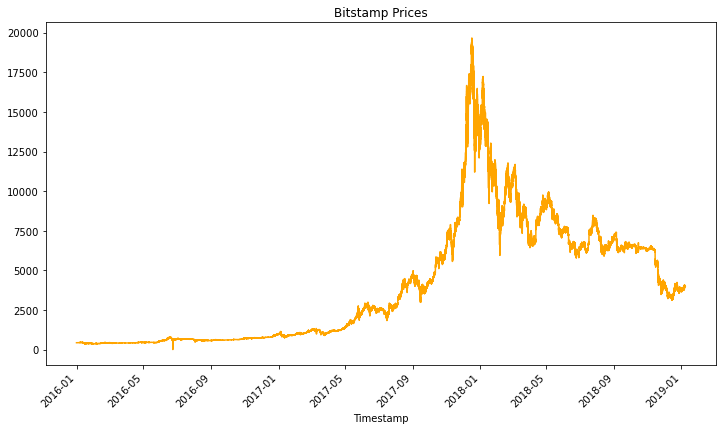

In [234]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind="line", title="Bitstamp Prices", figsize=(12,7), rot=45, color="orange")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

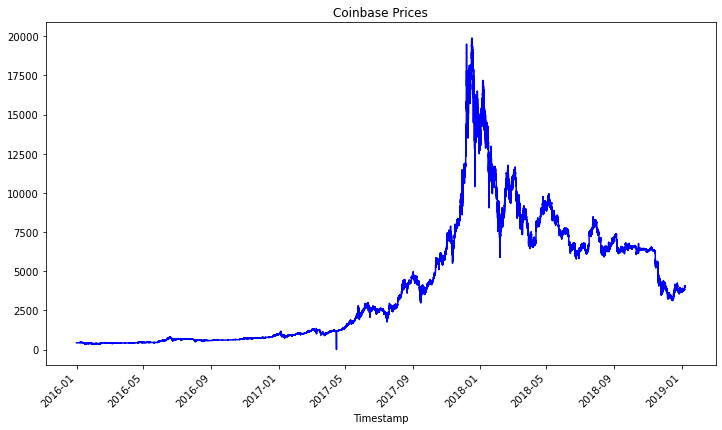

In [235]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind="line", title="Coinbase Prices", figsize=(12,7), rot=45, color="blue")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

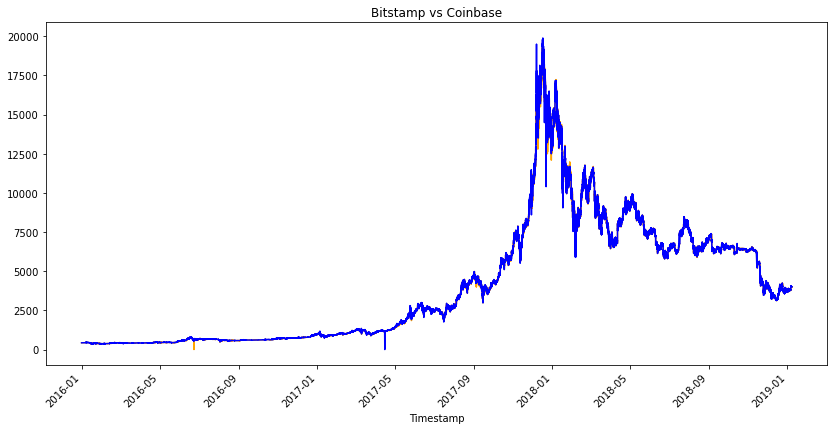

In [236]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(figsize=(14,7), rot=45, color="orange", title="Bitstamp vs Coinbase")
coinbase_sliced.plot(figsize=(14,7), rot=45, color="blue")




<AxesSubplot:title={'center':'Exchange Comparison (January, 2016)'}, xlabel='Timestamp'>

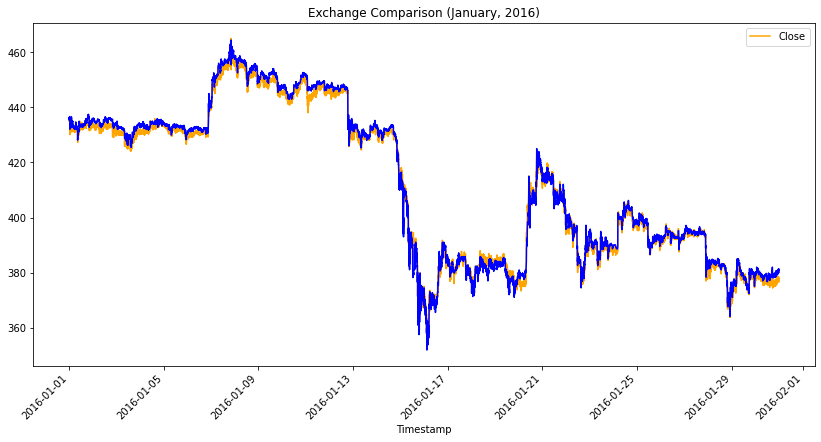

In [237]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_january_data = bitstamp_sliced.loc['2016-01-01':'2016-01-30']
coinbase_january_data = coinbase_sliced.loc['2016-01-01':'2016-01-30']
bitstamp_january_data.plot(figsize=(14,7), rot=45, color="orange", title= "Exchange Comparison (January, 2016)", legend = True)
coinbase_january_data.plot(figsize=(14,7), rot=45, color="blue")

<AxesSubplot:title={'center':'Exchange Comparison (January, 2019)'}, xlabel='Timestamp'>

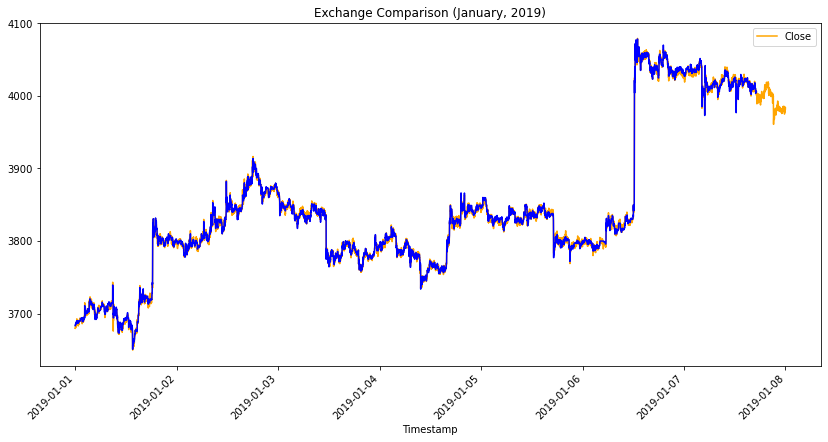

In [238]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_january_data = bitstamp_sliced.loc['2019-01-01':'2019-01-30']
coinbase_january_data = coinbase_sliced.loc['2019-01-01':'2019-01-30']
bitstamp_january_data.plot(figsize=(14,7), rot=45, color="orange", title= "Exchange Comparison (January, 2019)", legend = True)
coinbase_january_data.plot(figsize=(14,7), rot=45, color="blue")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # There is less opportunity for profit. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Daily Analysis (May 01, 2016)'}, xlabel='Timestamp'>

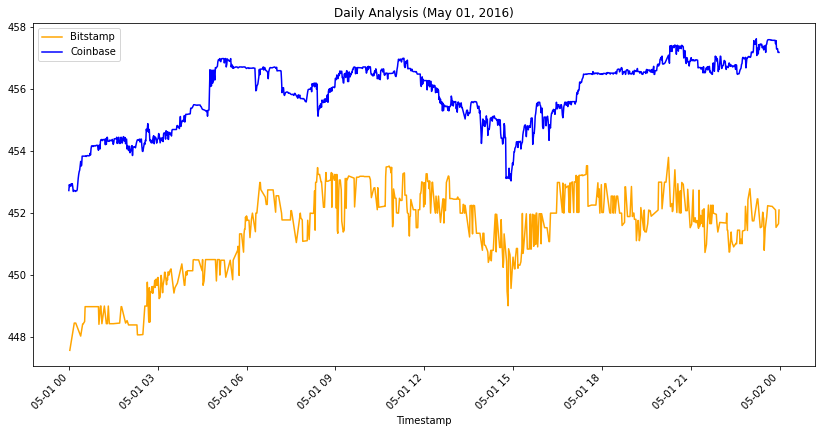

In [239]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2016-05-01'].plot(legend=True, figsize=(14, 7), rot=45, title="Daily Analysis (May 01, 2016)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2016-05-01'].plot(legend=True, figsize=(14, 7), rot=45, color="blue", label="Coinbase")


In [240]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_closing_early = bitstamp_sliced.loc['2016-05-01']
coinbase_closing_early = coinbase_sliced.loc['2016-05-01']
arbitrage_spread_early = coinbase_closing_early - bitstamp_closing_early

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()


count    579.000000
mean       4.296131
std        1.008769
min        1.870000
25%        3.510000
50%        4.280000
75%        5.030000
max        7.060000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread (May 01, 2016)'}>

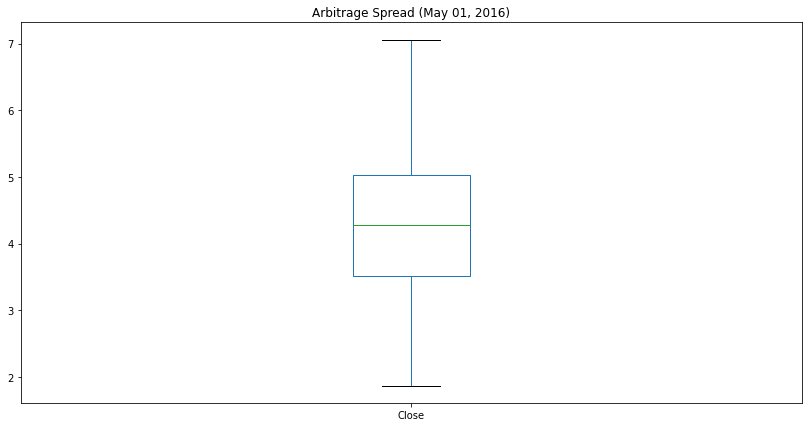

In [241]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_early.plot(kind='box', title="Arbitrage Spread (May 01, 2016)", figsize=(14,7))


<AxesSubplot:title={'center':'Daily Analysis (Jan 04, 2017)'}, xlabel='Timestamp'>

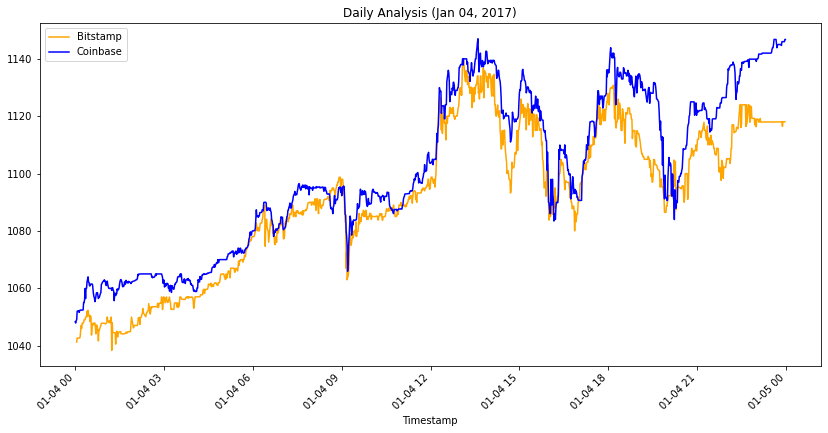

In [242]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2017-01-04'].plot(legend=True, figsize=(14, 7), rot=45, title="Daily Analysis (Jan 04, 2017)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2017-01-04'].plot(legend=True, figsize=(14, 7), rot=45, color="blue", label="Coinbase")


In [243]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_closing_middle = bitstamp_sliced.loc['2017-01-04']
coinbase_closing_middle = coinbase_sliced.loc['2017-01-04']
arbitrage_spread_middle = coinbase_closing_middle - bitstamp_closing_middle
# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()


count    1303.000000
mean        8.738734
std         7.277843
min       -14.340000
25%         4.105000
50%         7.170000
75%        12.180000
max        34.100000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread (Jan 04, 2017)'}>

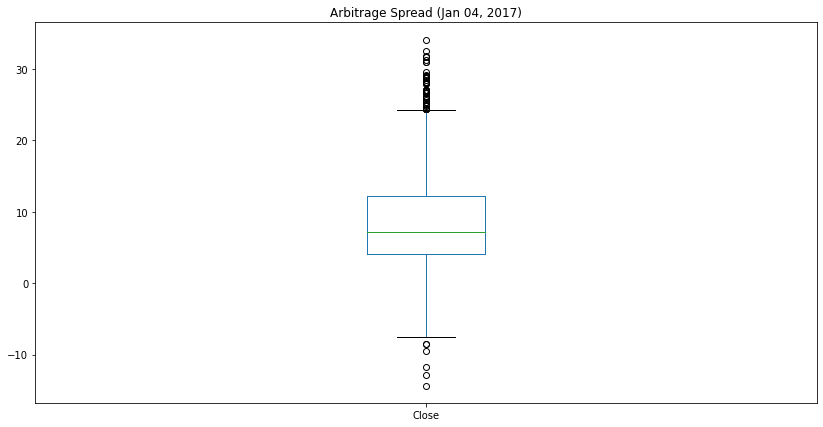

In [244]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.plot(kind="box", title="Arbitrage Spread (Jan 04, 2017)", figsize=(14,7))


<AxesSubplot:title={'center':'Daily Analysis (Jan 17, 2018)'}, xlabel='Timestamp'>

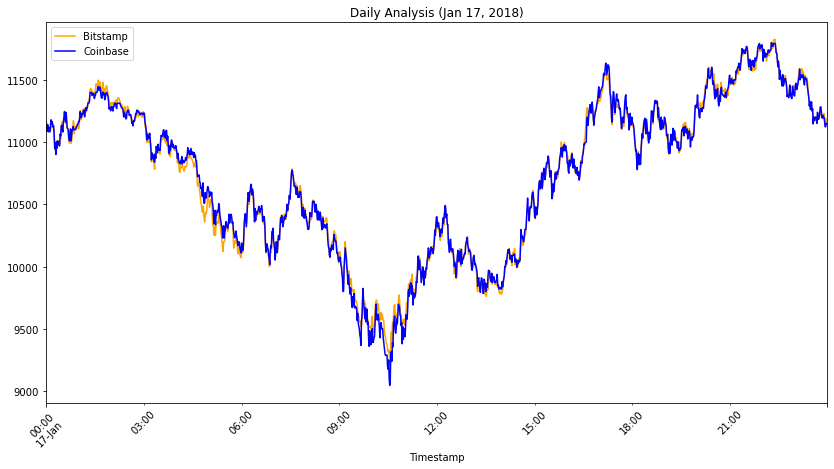

In [245]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-17'].plot(legend=True, figsize=(14, 7), rot=45, title="Daily Analysis (Jan 17, 2018)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2018-01-17'].plot(legend=True, figsize=(14, 7), rot=45, color="blue", label="Coinbase")


In [246]:
# Using the date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_closing_late = bitstamp_sliced.loc['2018-01-17']
coinbase_closing_late = coinbase_sliced.loc['2018-01-17']
arbitrage_spread_late = coinbase_closing_late - bitstamp_closing_late

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean       -0.291097
std        46.607831
min      -205.410000
25%       -24.427500
50%         0.010000
75%        25.995000
max       190.220000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread (Feb 10, 2018)'}>

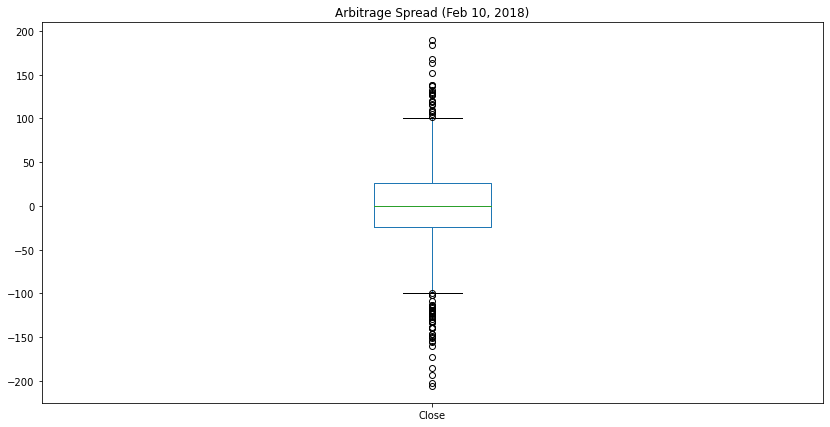

In [247]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_late.plot(kind='box', title="Arbitrage Spread (Feb 10, 2018)", figsize=(14,7))


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [248]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_closing_early - bitstamp_closing_early

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()


count    579.000000
mean       4.296131
std        1.008769
min        1.870000
25%        3.510000
50%        4.280000
75%        5.030000
max        7.060000
Name: Close, dtype: float64

In [249]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_closing_middle - bitstamp_closing_middle

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()


count    1217.000000
mean        9.582235
std         6.732119
min         0.020000
25%         4.710000
50%         7.850000
75%        12.720000
max        34.100000
Name: Close, dtype: float64

In [250]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_closing_late - bitstamp_closing_late

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    723.000000
mean      33.601701
std       29.109595
min        0.010000
25%       12.940000
50%       25.910000
75%       46.005000
max      190.220000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [251]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_closing_early

# Review the spread return DataFrame
spread_return_early.head()


Timestamp
2016-05-01 00:02:00    0.011819
2016-05-01 00:11:00    0.009544
2016-05-01 00:13:00    0.009477
2016-05-01 00:14:00    0.009499
2016-05-01 00:24:00    0.012588
Name: Close, dtype: float64

In [252]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_closing_middle

# Review the spread return DataFrame
spread_return_middle.head()


Timestamp
2017-01-04 00:03:00    0.007462
2017-01-04 00:04:00    0.008968
2017-01-04 00:05:00    0.008997
2017-01-04 00:06:00    0.009179
2017-01-04 00:07:00    0.009092
Name: Close, dtype: float64

In [253]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_closing_late

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-01-17 00:00:00         NaN
2018-01-17 00:01:00         NaN
2018-01-17 00:02:00         NaN
2018-01-17 00:03:00    0.000637
2018-01-17 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [254]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2016-05-01 00:02:00    0.011819
2016-05-01 00:24:00    0.012588
2016-05-01 00:28:00    0.012087
2016-05-01 00:29:00    0.012087
2016-05-01 00:32:00    0.011906
Name: Close, dtype: float64

In [255]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()


Timestamp
2017-01-04 00:20:00    0.010391
2017-01-04 00:25:00    0.012158
2017-01-04 00:26:00    0.011080
2017-01-04 00:27:00    0.010580
2017-01-04 00:28:00    0.011169
Name: Close, dtype: float64

In [256]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-01-17 04:45:00    0.010996
2018-01-17 04:46:00    0.013017
2018-01-17 04:47:00    0.013194
2018-01-17 04:48:00    0.012125
2018-01-17 04:49:00    0.017560
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [257]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()


count    245.000000
mean       0.011667
std        0.001202
min        0.010022
25%        0.010750
50%        0.011466
75%        0.012249
max        0.015691
Name: Close, dtype: float64

In [258]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()


count    391.000000
mean       0.016093
std        0.004739
min        0.010009
25%        0.012115
50%        0.014899
75%        0.019681
max        0.030901
Name: Close, dtype: float64

In [259]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    23.000000
mean      0.012935
std       0.002331
min       0.010323
25%       0.011264
50%       0.012439
75%       0.013514
max       0.018283
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [260]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_closing_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()


Timestamp
2016-05-01 00:02:00    5.29
2016-05-01 00:24:00    5.64
2016-05-01 00:28:00    5.42
2016-05-01 00:29:00    5.42
2016-05-01 00:32:00    5.34
Name: Close, dtype: float64

In [261]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_closing_middle

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()

Timestamp
2017-01-04 00:20:00    10.90
2017-01-04 00:25:00    12.77
2017-01-04 00:26:00    11.66
2017-01-04 00:27:00    11.12
2017-01-04 00:28:00    11.73
Name: Close, dtype: float64

In [262]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_closing_late

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-01-17 04:45:00    115.62
2018-01-17 04:46:00    136.68
2018-01-17 04:47:00    138.04
2018-01-17 04:48:00    126.54
2018-01-17 04:49:00    184.17
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [263]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()


count    245.000000
mean       5.259020
std        0.535904
min        4.520000
25%        4.850000
50%        5.180000
75%        5.530000
max        7.060000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade (May 01, 2016)'}, xlabel='Timestamp'>

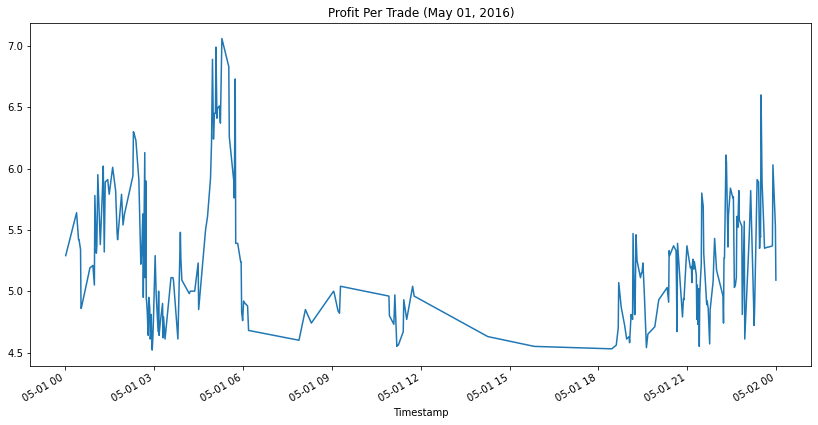

In [264]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(title="Profit Per Trade (May 01, 2016)", figsize=(14,7))


In [265]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()


count    391.000000
mean      17.634962
std        5.358959
min       10.570000
25%       13.035000
50%       16.270000
75%       21.860000
max       34.100000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade (January 04, 2017)'}, xlabel='Timestamp'>

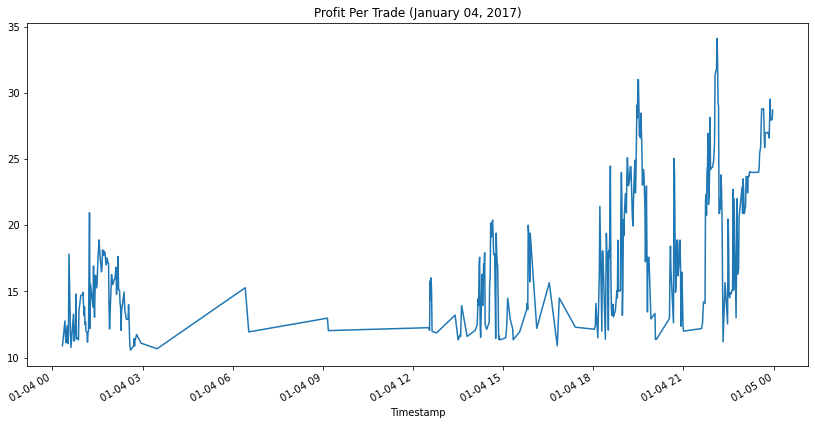

In [266]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(title="Profit Per Trade (January 04, 2017)", figsize=(14,7))


In [267]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count     23.000000
mean     133.191739
std       23.842599
min      101.720000
25%      117.750000
50%      127.660000
75%      138.380000
max      190.220000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade (January 17, 2018)'}, xlabel='Timestamp'>

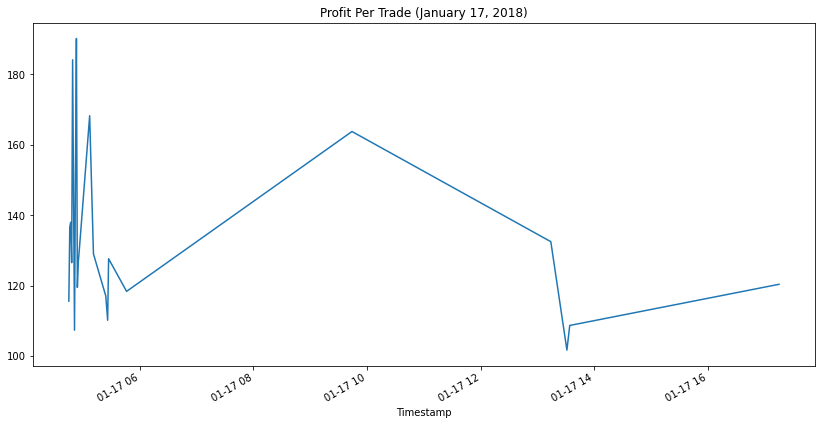

In [268]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(title="Profit Per Trade (January 17, 2018)", figsize=(14,7))

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [269]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early


1288.4599999999996

In [270]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle


6895.270000000006

In [271]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late


3063.409999999998

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [272]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early.tail()


Timestamp
2016-05-01 23:45:00    1266.44
2016-05-01 23:52:00    1271.81
2016-05-01 23:53:00    1277.84
2016-05-01 23:58:00    1283.37
2016-05-01 23:59:00    1288.46
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profits (May 01, 2016)'}, xlabel='Timestamp'>

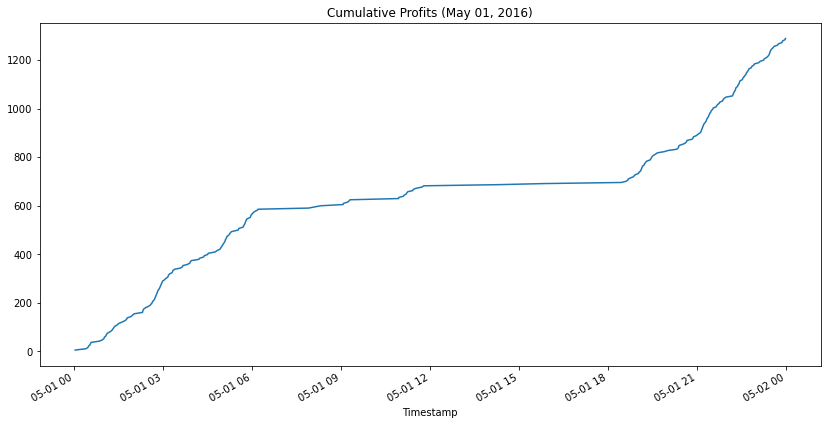

In [273]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize=(14, 7), title="Cumulative Profits (May 01, 2016)")

In [274]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.tail()


Timestamp
2017-01-04 23:53:00    6782.70
2017-01-04 23:54:00    6810.65
2017-01-04 23:56:00    6838.61
2017-01-04 23:57:00    6866.57
2017-01-04 23:58:00    6895.27
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profits (Jan 04, 2017)'}, xlabel='Timestamp'>

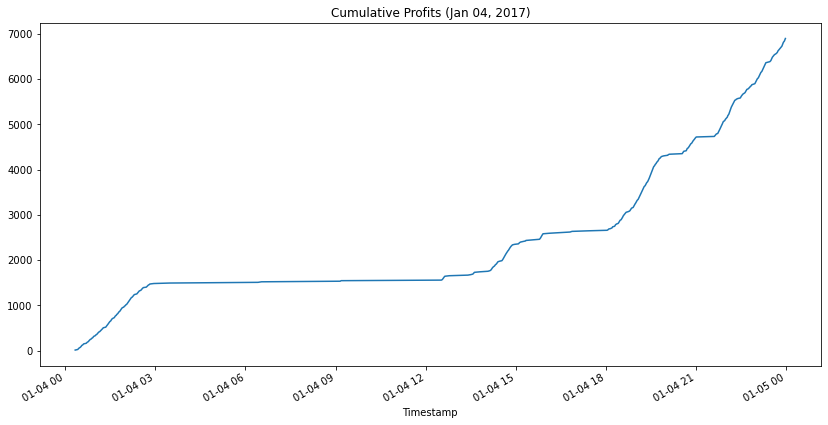

In [275]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(figsize=(14, 7), title="Cumulative Profits (Jan 04, 2017)")


In [276]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.tail()


Timestamp
2018-01-17 09:44:00    2600.07
2018-01-17 13:14:00    2732.58
2018-01-17 13:31:00    2834.30
2018-01-17 13:34:00    2943.01
2018-01-17 17:15:00    3063.41
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profits (January 17, 2018)'}, xlabel='Timestamp'>

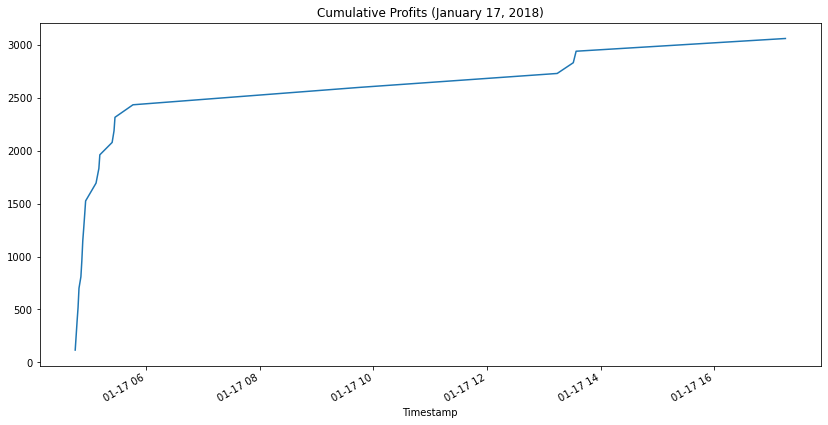

In [277]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(figsize=(14, 7), title="Cumulative Profits (January 17, 2018)")


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.